In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/E-commerce Shipping Dataset.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Shape of dataset: (10999, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB

Unique values per column:
ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Cust

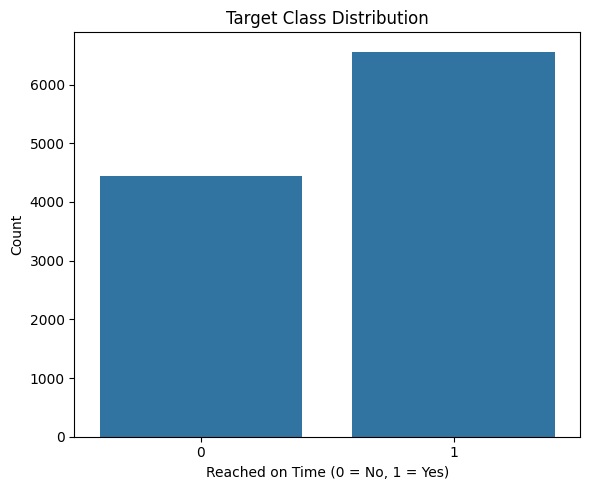

In [ ]:
print("Shape of dataset:", df.shape)
print("\nInfo:")
df.info()

print("\nUnique values per column:")
print(df.nunique())


plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Reached.on.Time_Y.N', data=df)
plt.title("Target Class Distribution")
plt.xlabel("Reached on Time (0 = No, 1 = Yes)")
plt.ylabel("Count")



plt.tight_layout()
plt.show()


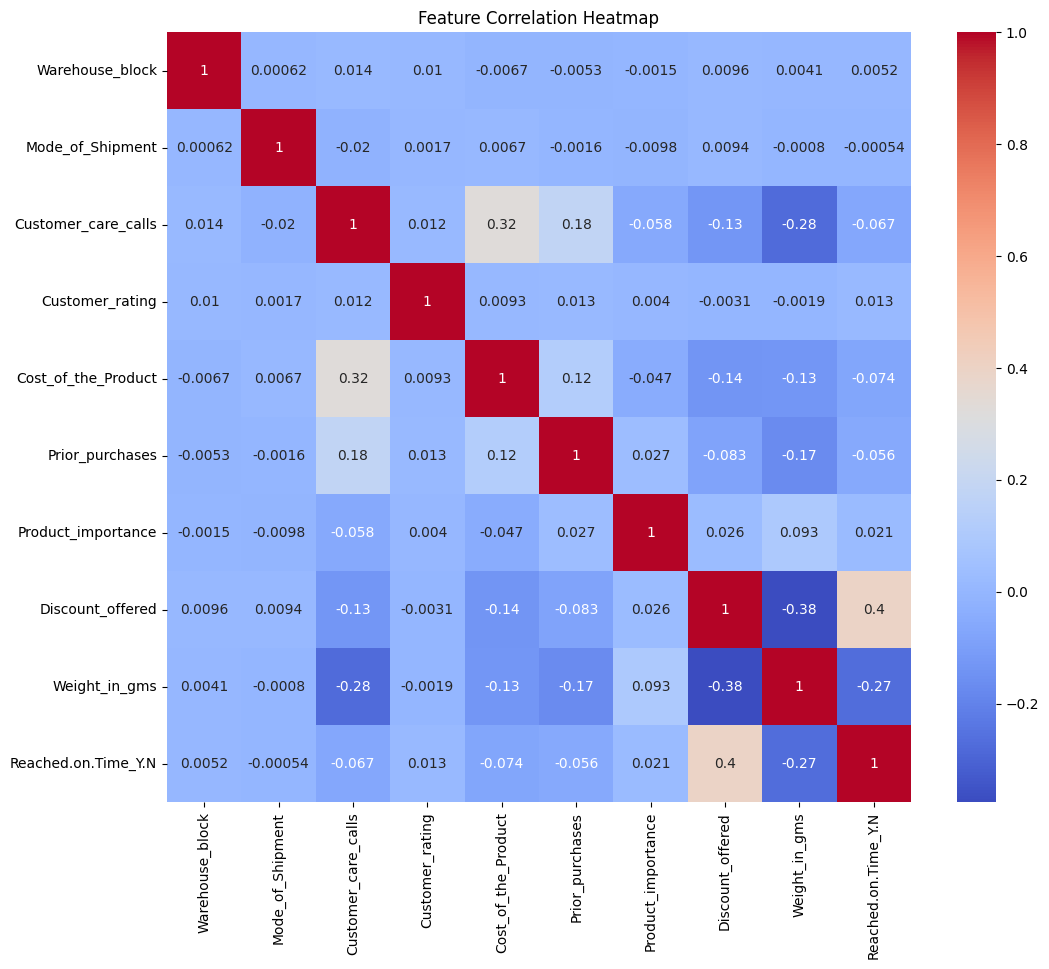

In [ ]:
df_corr = df.copy()
df_corr.drop("ID", axis=1, inplace=True)
df_corr.drop("Gender", axis=1, inplace=True)


# df_corr.drop("Customer_care_calls", axis=1, inplace=True)


#encoding manually
importance_map = {'low': 0, 'medium': 1, 'high': 2}
df_corr['Product_importance'] = df_corr['Product_importance'].map(importance_map)


#encoding
df_corr['Warehouse_block'] = df_corr['Warehouse_block'].astype('category').cat.codes
df_corr['Mode_of_Shipment'] = df_corr['Mode_of_Shipment'].astype('category').cat.codes

plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
df_corr.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,0,44,1233,1
1,4,0,4,5,216,2,0,59,3088,1
2,0,0,2,2,183,4,0,48,3374,1
3,1,0,3,3,176,4,1,10,1177,1
4,2,0,2,2,184,3,1,46,2484,1


In [ ]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_encoded = df.copy()
df_encoded.drop('ID', axis=1, inplace=True)
df_encoded.drop('Gender', axis=1, inplace=True)


# df_encoded.drop("Customer_care_calls", axis=1, inplace=True)

#one-hot encoding
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

#feature_scaling
scaler = MinMaxScaler()


features = df_encoded.drop('Reached.on.Time_Y.N', axis=1)
features_scaled = scaler.fit_transform(features)


X = pd.DataFrame(features_scaled, columns=features.columns)
y = df_encoded['Reached.on.Time_Y.N']


In [ ]:
X[:20]

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium
0,0.4,0.25,0.378505,0.125,0.671875,0.033893,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.4,1.00,0.560748,0.000,0.906250,0.304894,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.25,0.406542,0.250,0.734375,0.346676,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.2,0.50,0.373832,0.250,0.140625,0.025712,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.25,0.411215,0.125,0.703125,0.216654,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.2,0.00,0.308411,0.125,0.171875,0.060774,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0.2,0.75,0.719626,0.125,0.031250,0.200146,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0.4,0.00,0.640187,0.000,0.734375,0.263404,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.2,0.75,0.252336,0.125,0.156250,0.125639,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.2,0.25,0.317757,0.125,0.437500,0.027173,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=20)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 7699
Testing samples: 3300


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

dt = DecisionTreeClassifier(random_state=20)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(32, 16, 8), max_iter=1000, random_state=20)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

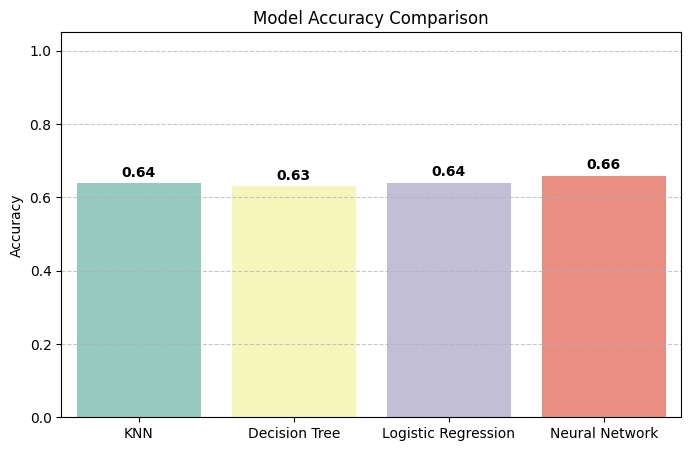

In [ ]:
# Accuracy scores
accuracies = {
    'KNN': accuracy_score(y_test, y_pred_knn),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Neural Network': accuracy_score(y_test, y_pred_mlp)
}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="Set3")

# Add accuracy labels
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', va='bottom', fontweight='bold')

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


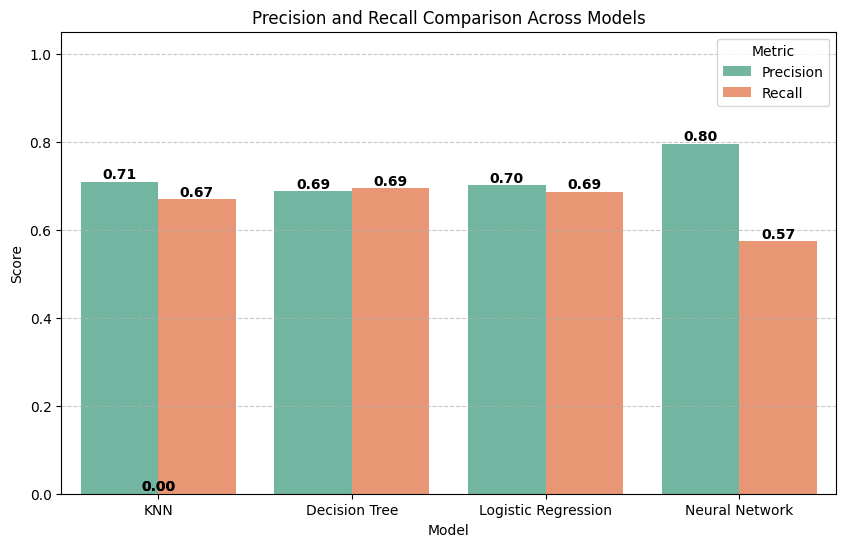

In [ ]:
metrics = {
    'KNN': [precision_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn)],
    'Decision Tree': [precision_score(y_test, y_pred_dt), recall_score(y_test, y_pred_dt)],
    'Logistic Regression': [precision_score(y_test, y_pred_lr), recall_score(y_test, y_pred_lr)],
    'Neural Network': [precision_score(y_test, y_pred_mlp), recall_score(y_test, y_pred_mlp)],
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics, index=["Precision", "Recall"]).T.reset_index().melt(id_vars="index", var_name="Metric", value_name="Score")


plt.figure(figsize=(10, 6))
ax = sns.barplot(data=metrics_df, x="index", y="Score", hue="Metric", palette="Set2")


for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Precision and Recall Comparison Across Models")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(title="Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


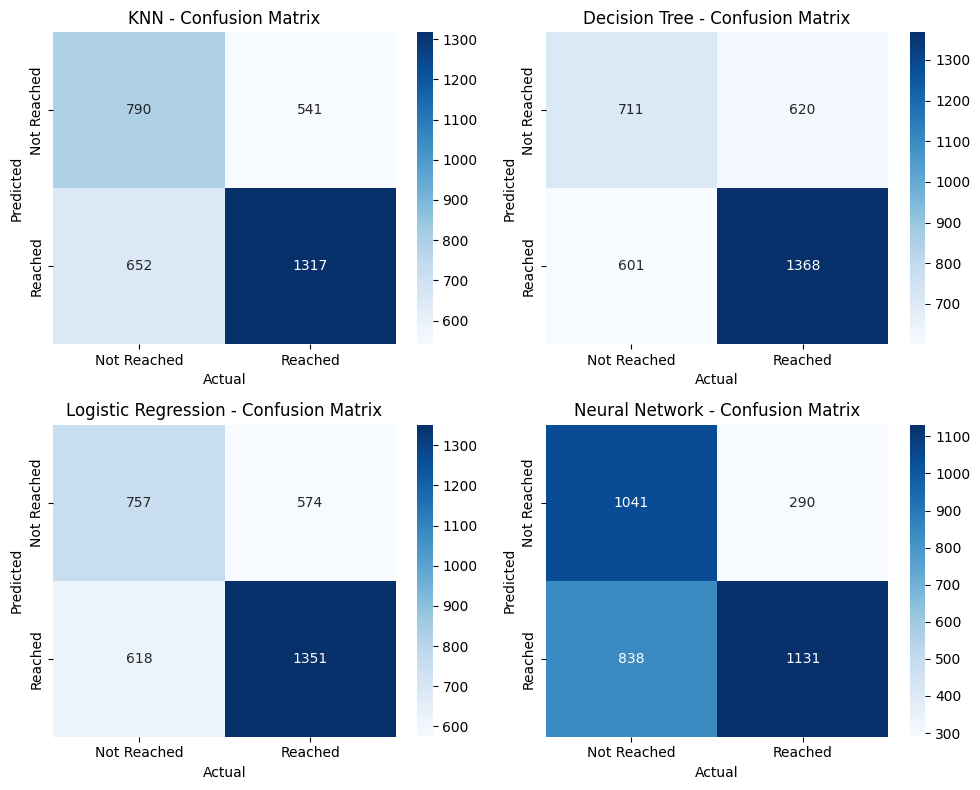

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,8 ))

models_preds = {
    "KNN": y_pred_knn,
    "Decision Tree": y_pred_dt,
    "Logistic Regression": y_pred_lr,
    "Neural Network": y_pred_mlp
}

for ax, (name, preds) in zip(axes.flat, models_preds.items()):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Not Reached", "Reached"],
                yticklabels=["Not Reached", "Reached"],
                ax=ax)
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.set_title(f"{name} - Confusion Matrix")

plt.tight_layout()
plt.show()


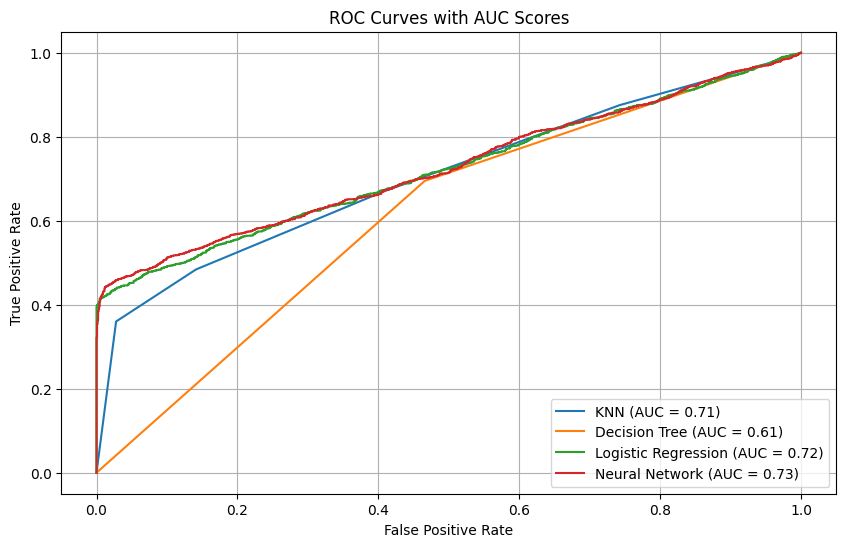

In [ ]:
model_probs = {
    'KNN': knn.predict_proba(X_test)[:, 1],
    'Decision Tree': dt.predict_proba(X_test)[:, 1],
    'Logistic Regression': lr.predict_proba(X_test)[:, 1],
    'Neural Network': mlp.predict_proba(X_test)[:, 1]
}

plt.figure(figsize=(10, 6))

# Plot ROC curves
for name, probs in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")


plt.title("ROC Curves with AUC Scores")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import f1_score

summary = []

for model_name, y_pred in models_preds.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model_probs[model_name])

    summary.append({
        "Model": model_name,
        "Accuracy": round(acc, 2),
        "Precision": round(prec, 2),
        "Recall": round(rec, 2),
        "F1-Score": round(f1, 2),
        "AUC Score": round(auc, 2)
    })

# Convert to DataFrame
report_df = pd.DataFrame(summary)
print("\n📊 Model Performance Summary:")
print(report_df)





📊 Model Performance Summary:
                 Model  Accuracy  Precision  Recall  F1-Score  AUC Score
0                  KNN      0.64       0.71    0.67      0.69       0.71
1        Decision Tree      0.63       0.69    0.69      0.69       0.61
2  Logistic Regression      0.64       0.70    0.69      0.69       0.72
3       Neural Network      0.66       0.80    0.57      0.67       0.73
